In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [4]:
X_train = X_train.reshape((60000, 28*28))
X_test = X_test.reshape((10000, 28*28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [5]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

print(X_train[4])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [6]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
from keras import models, layers
from keras import regularizers

L2_dropOut = models.Sequential()
L2_dropOut.add(layers.Dense(512, activation='relu', input_shape = (28*28,),
                            kernel_regularizer=regularizers.l2(0.00001)))
L2_dropOut.add(layers.Dropout(0.4))
L2_dropOut.add(layers.Dense(256, activation='relu', 
                            kernel_regularizer = regularizers.l2(0.00001)))
L2_dropOut.add(layers.Dropout(0.4))
L2_dropOut.add(layers.Dense(10, activation='softmax'))

L2_dropOut.summary()

L2_dropOut.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_L2_dropOut = L2_dropOut.fit(X_train, y_train, epochs=100, batch_size=516, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
94/94 [==============================] - 4s 10ms/step - loss: 0.9543 - accuracy: 0.7046 - val_loss: 0.19

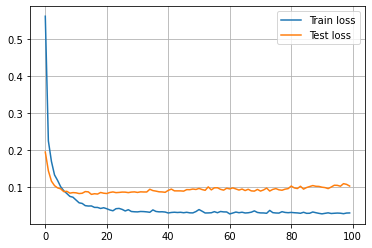

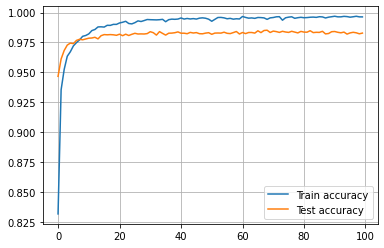

In [10]:
import matplotlib.pyplot as plt

plt.plot(Hist_L2_dropOut.history['loss'])
plt.plot(Hist_L2_dropOut.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

plt.plot(Hist_L2_dropOut.history['accuracy'])
plt.plot(Hist_L2_dropOut.history['val_accuracy'])
plt.legend(['Train accuracy','Test accuracy'])
plt.grid()
plt.show()

In [11]:
L2_DR_loss, L2_DR_accuracy = L2_dropOut.evaluate(X_test, y_test)
print(L2_DR_loss, L2_DR_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0928 - accuracy: 0.9847
0.09284582734107971 0.9847000241279602


In [12]:
from keras import backend as K

K.clear_session()

In [13]:
L2_BN = models.Sequential()
L2_BN.add(layers.Dense(512, input_shape=(28*28,),
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(256,
                       kernel_regularizer=regularizers.l2(0.00001)))
L2_BN.add(layers.BatchNormalization())
L2_BN.add(layers.Activation('relu'))
L2_BN.add(layers.Dense(10, activation='softmax'))

L2_BN.summary()

L2_BN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_L2_BN = L2_BN.fit(X_train, y_train, epochs=100, batch_size=516, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

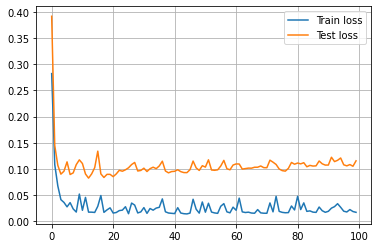

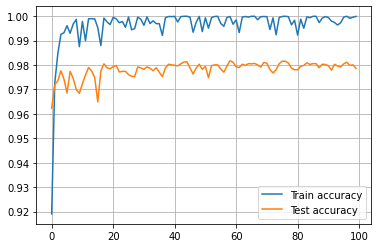

In [14]:
plt.plot(Hist_L2_BN.history['loss'])
plt.plot(Hist_L2_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

plt.plot(Hist_L2_BN.history['accuracy'])
plt.plot(Hist_L2_BN.history['val_accuracy'])
plt.legend(['Train accuracy','Test accuracy'])
plt.grid()
plt.show()

In [15]:
L2_BN_loss, L2_BN_accuracy = L2_BN.evaluate(X_test, y_test)
print(L2_BN_loss, L2_BN_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9813
0.10151764750480652 0.9812999963760376


In [16]:
from keras import backend as K

K.clear_session()

In [17]:
DR_BN = models.Sequential()

DR_BN.add(layers.Dense(512, input_shape=(28*28,)))
DR_BN.add(layers.BatchNormalization())
DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(256))
DR_BN.add(layers.BatchNormalization())

DR_BN.add(layers.Activation('relu'))
DR_BN.add(layers.Dropout(0.4))
DR_BN.add(layers.Dense(10, activation='softmax'))

DR_BN.summary()

DR_BN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Hist_DR_BN = DR_BN.fit(X_train, y_train, epochs=100, batch_size=516, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0

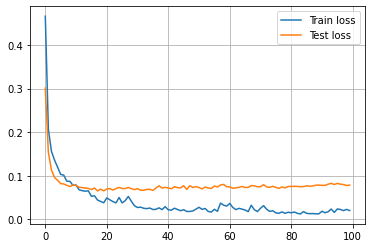

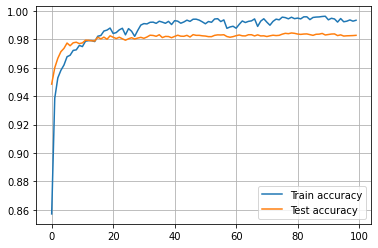

In [18]:
plt.plot(Hist_DR_BN.history['loss'])
plt.plot(Hist_DR_BN.history['val_loss'])
plt.legend(['Train loss','Test loss'])
plt.grid()
plt.show()

plt.plot(Hist_DR_BN.history['accuracy'])
plt.plot(Hist_DR_BN.history['val_accuracy'])
plt.legend(['Train accuracy','Test accuracy'])
plt.grid()
plt.show()

In [19]:
loss_DR_BN, accuracy_DR_BN = DR_BN.evaluate(X_test, y_test)
print(loss_DR_BN, accuracy_DR_BN)

313/313 [==============================] - 1s 3ms/step - loss: 0.0650 - accuracy: 0.9840
0.0650414526462555 0.984000027179718
